<a href="https://colab.research.google.com/github/walji123/sales-dashboard-analysis/blob/main/sales_dashboard_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows before adding date:
   sale_id branch         city customer_type  gender  product_name  \
0        1      A     New York        Member    Male       Shampoo   
1        2      B  Los Angeles        Normal  Female      Notebook   
2        3      A     New York        Member  Female         Apple   
3        4      A      Chicago        Normal    Male     Detergent   
4        5      B  Los Angeles        Member  Female  Orange Juice   

  product_category  unit_price  quantity   tax  total_price  reward_points  
0    Personal Care        5.50         3  1.16        17.66              1  
1       Stationery        2.75        10  1.93        29.43              0  
2           Fruits        1.20        15  1.26        19.26              1  
3        Household        7.80         5  2.73        41.73              0  
4        Beverages        3.50  

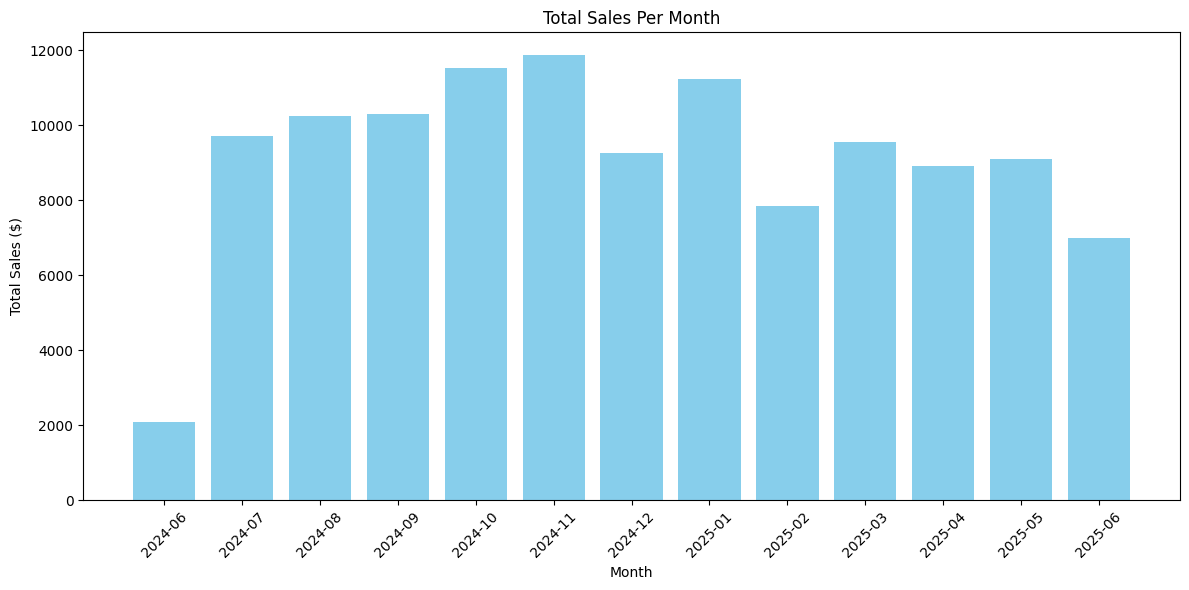

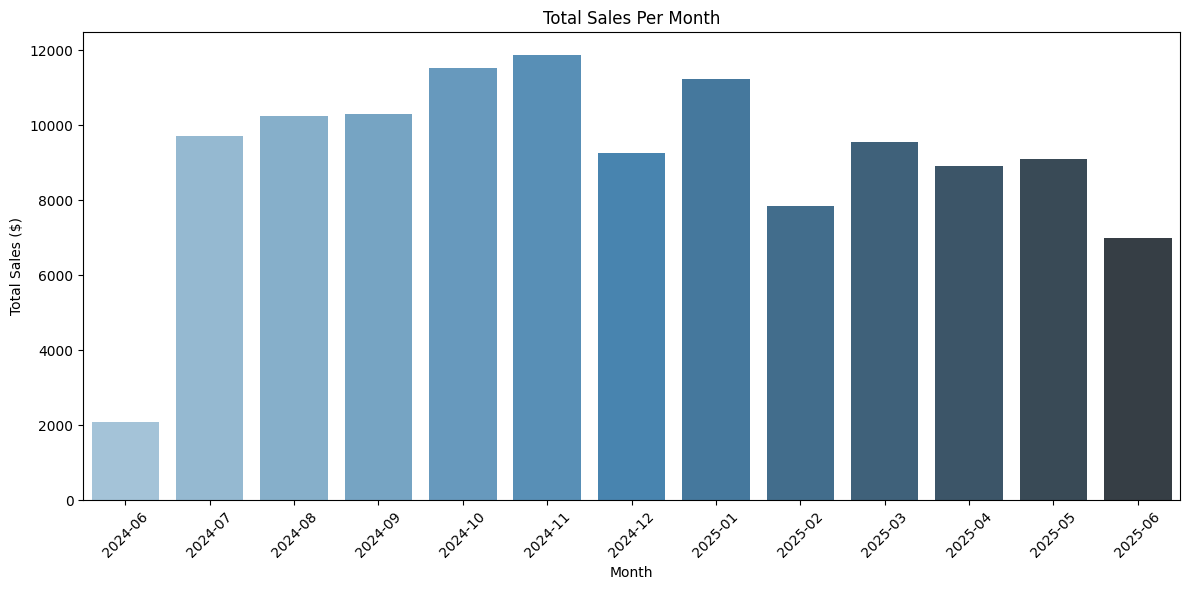

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Load the CSV from Google Drive (update the path if needed)
df = pd.read_csv('/content/drive/MyDrive/sales.csv')

# 3. Preview first 5 rows before processing
print("First 5 rows before adding date:")
print(df.head())

# 4. Basic info and missing values
print("\nDataFrame info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

# 5. Check and remove duplicate rows if any
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New row count: {len(df)}")

# 6. Simulate 'date' column with random dates over the past 365 days
n = len(df)
date_range = pd.date_range(end=pd.Timestamp.today(), periods=365)
df['date'] = np.random.choice(date_range, size=n)

# 6a. Convert date column to simple date format (strip time)
df['date'] = pd.to_datetime(df['date']).dt.date

# 7. Preview new data with date column
print("\nFirst 5 rows after adding date:")
print(df.head())

# 8. Final shape of DataFrame
print(f"\nFinal DataFrame shape: {df.shape}")

# 9. --- Now, start analyzing: Group and visualize total sales per month ---

# Convert 'date' back to datetime for time-series grouping
df['date'] = pd.to_datetime(df['date'])

# Create a new column for month (e.g., '2025-06')
df['month'] = df['date'].dt.to_period('M')

# Group by the month and sum total sales ('total_price')
monthly_sales = df.groupby('month')['total_price'].sum().reset_index()

# Convert the 'month' column back to a string for plotting
monthly_sales['month'] = monthly_sales['month'].astype(str)

# Preview grouped data
print("\nMonthly Sales:")
print(monthly_sales)

# 10. Plot the total sales per month using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['month'], monthly_sales['total_price'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# Alternatively, you can use Seaborn for a similar chart:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_price', data=monthly_sales, hue='month', palette='Blues_d', legend=False)
plt.xticks(rotation=45)
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
